# Canonicalize CHEMBL molecules
We're doing this once so we can save on compute later.
Guacamol optimizers often canonicalize these sets.

In [ ]:
from guacamol.utils.chemistry import canonicalize
import os
from multiprocessing import Pool
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
files = [f for f in glob('data/*') if not f.endswith('.can')]

for file in files:
    can_file = file+'.can'
    if os.path.isfile(can_file):
        continue
        
    with open(file) as f:
        smiles = f.read().split()
    with Pool(16) as pool:
        can_smiles = pool.map(canonicalize, smiles)    
    
    print(len(smiles), len(can_smiles))
    with open(can_file, 'w') as f:
        f.write('\n'.join(smiles))

1591378 1591378
79568 79568
1273104 1273104
238706 238706


# Preprocessing of JAK2

In [ ]:
def prepjak2(write=False):
    chid = 'CHEMBL3888429'
    df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
    df = df[['Smiles', 'pChEMBL Value']]
    df.columns = ['smiles', 'value']

    label = np.array([1 if x>8 else 0 for x in df.value])
    print(label.mean())
    df['label'] = label
    print(len(df))
    tups = [(s,l) for s, l in zip(df.smiles, df.label)]
    from collections import Counter
    if write:
        df.to_csv(f'./assays/processed/{chid}.csv', index=None)
    return df
prepjak2()

0.2098950524737631
667


,smiles,value,label
0,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(Cc4cccn...,6.84,0
1,CN(C1CCC(CC#N)(CC1)n2cc(C(=O)N)c(Nc3ccnc(F)c3)...,6.98,0
2,NC(=O)c1cn(nc1Nc2ccc(F)cc2)C3(CC#N)CCN(CC3)C(=...,7.48,0
3,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(CC3)C(=...,8.05,1
4,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCC(CC3)NCc...,8.70,1
...,...,...,...
662,Cc1c[nH]c(CN2CCC(CC#N)(CC2)n3cc(C(=O)N)c(Nc4cc...,5.93,0
663,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(Cc4cn5c...,NaN,0
664,CC(C)(C)OC(=O)N1CCC(CC#N)(CC1)n2cc(C(=O)N)c(Nc...,7.96,0
665,NC(=O)c1cn(nc1Nc2ccc(cc2)S(=O)(=O)C(F)F)C3(CC#...,9.00,1


# EGFR

In [ ]:
def prepegfr(write=False):
    chid = 'CHEMBL1909203'
    df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
    df.head()

    # df[]
    df['label'] = pd.isna(df['Comment']).astype('int')
    df['smiles'] = df['Smiles']
    df = df[['smiles', 'label']]
    print(df.label.sum())
    df = df.dropna()
    print(df.label.sum())
    if write:
        df.to_csv(f'./assays/processed/{chid}.csv', index=None)
    return df
prepegfr()

47
40


,smiles,label
0,CC(C)NCC(O)c1ccccc1Cl,0
1,CO[C@]1(NC(=O)CSCC#N)[C@H]2SCC(=C(N2C1=O)C(=O)...,0
2,CCN1C[C@]2(COC)[C@H](O)C[C@@H](OC)[C@@]34[C@@H...,0
3,[Cl-].COc1cc2CC[N+](C)(C)[C@@H]3Cc4ccc(O)c(Oc5...,0
4,CNCCc1ccccn1,0
...,...,...
866,CN(C)CCCN1c2ccccc2Sc3ccc(Cl)cc13,1
867,CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC,0
868,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,0
869,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,0


In [ ]:
chid = 'CHEMBL1909140'
df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
df['pChEMBL Value']
df = df[df['Comment'].isna()]
df['pChEMBL Value']

2      6.11
4      6.87
60     7.46
69     6.49
80     5.48
103    6.30
114    5.50
135    6.26
140    5.91
159    6.80
161    6.08
166    4.64
167    8.83
169    4.90
178    6.15
223    6.96
295    6.84
307    8.39
320    6.45
333    6.41
340    4.88
356    8.80
390    4.89
397    7.70
414    8.62
416    8.58
441    6.89
455    4.78
478    5.88
501    6.70
509    6.93
518    8.30
526    5.21
535    5.94
563    6.69
569    6.00
573    8.05
585    6.09
593    8.54
594    5.46
600    5.69
612    5.23
623    4.70
626    6.79
633    8.71
651    7.20
684    8.37
733    6.90
743    8.79
746    5.93
752    7.96
766    4.91
770    5.34
795    4.86
801    6.33
804    8.18
809    6.38
843    7.27
861    6.11
Name: pChEMBL Value, dtype: float64

# DRD2

In [ ]:
def prepdrd2(write=False):
    chid = 'CHEMBL1909140'
    df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
    df.head()

    # df[]
    df['label'] = pd.isna(df['Comment']).astype('int')
    df['smiles'] = df['Smiles']
    df = df[['smiles', 'label']]
    print(df.label.sum())
    df = df.dropna()
    print(df.label.sum())
    df.to_csv(f'./assays/processed/{chid}.csv', index=None)
    return df
prepdrd2()

59
59


,smiles,label
0,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](NC(=O)N3CCNC3=...,0
1,[Na+].CN(CS(=O)(=O)[O-])C1=C(C)N(C)N(C1=O)c2cc...,0
2,C(\C=C\c1ccccc1)N2CCN(CC2)C(c3ccccc3)c4ccccc4,1
3,CC(CCc1ccc(O)cc1)NCCc2ccc(O)c(O)c2,0
4,CN1CCC[C@@H]1CCO[C@](C)(c2ccccc2)c3ccc(Cl)cc3,1
...,...,...
866,N[C@@H](Cc1ccc(cc1)N(CCCl)CCCl)C(=O)O,0
867,CC(=O)O[C@H]1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OC[C...,0
868,OC1=NC(=O)C(N1)(c2ccccc2)c3ccccc3,0
869,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,0


# Plasmodium Falciparum

0.3028153402793172

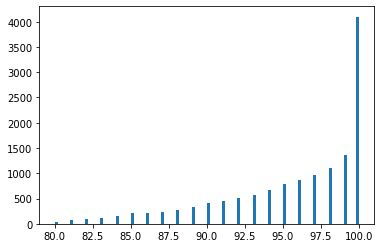

In [ ]:
chid = 'CHEMBL1054500'

df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
value = df['Standard Value']
plt.hist(value, bins=100);
(value > 99).mean()

In [ ]:
# df = prepdrd2()
df = prepjak2()
# df = prepegfr()

smiles0 = df.smiles[df.label == 0]
smiles1 = df.smiles[df.label == 1]
ssmiles0 = set(smiles0)
ssmiles1 = set(smiles1)
print('------')
print(len(smiles0))
print(len(ssmiles0))
print(len(smiles1))
print(len(ssmiles1))
print(len(ssmiles0 & ssmiles1))

0.2098950524737631
667
------
527
506
140
138
24
